In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
# uncomment when run notebook in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# scores matrix
input_scores = pd.read_csv('../data/W1T2/X_reduced_492.csv', delimiter=';', header=None)

input_scores

,0,1,2,3,4,5,6,7,8,9
0,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
1,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
2,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
3,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
4,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
...,...,...,...,...,...,...,...,...,...,...
95,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
96,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
97,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431
98,-430.287369,-2.299082,-71.359899,33.307816,46.963533,-7.817365,40.445894,12.727879,3.251827,7.70431


In [3]:
# loadings (weights) matrix
input_loadings = pd.read_csv('../data/W1T2/X_loadings_492.csv', delimiter=';', header=None)

input_loadings

,0,1,2,3,4,5,6,7,8,9
0,-1.098222e-17,-1.230054e-19,-4.920268e-18,5.734450e-18,1.324102e-17,-2.588536e-18,1.595830e-17,8.633723e-18,3.203943e-18,9.662225e-18
1,1.110223e-16,-5.290907e-17,1.665335e-16,1.387779e-16,2.775558e-17,4.857226e-17,6.938894e-17,-2.532696e-16,-1.908196e-17,2.775558e-17
2,-0.000000e+00,-1.214306e-17,-0.000000e+00,1.665335e-16,0.000000e+00,-2.775558e-17,-5.551115e-17,5.551115e-17,-6.938894e-17,-4.163336e-17
3,-0.000000e+00,5.551115e-17,1.110223e-16,9.020562e-17,-5.551115e-17,-5.551115e-17,2.220446e-16,2.775558e-17,-8.326673e-17,-1.249001e-16
4,-0.000000e+00,-5.551115e-17,-0.000000e+00,1.110223e-16,-5.551115e-17,1.474515e-17,-5.551115e-17,-1.387779e-16,1.387779e-17,2.775558e-17
...,...,...,...,...,...,...,...,...,...,...
95,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
96,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
97,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
98,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00


In [4]:
# F = Z * phi ^ (T)
# F - initial (centralized) data
# Z - scores matrix
# phi - loadings (weights) matrix
centralized_data = input_scores.dot(input_loadings.transpose())

centralized_data

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,6.750183e-15,-5.425278e-14,3.706703e-15,8.823624e-16,-2.649313e-15,-3.185579e-15,-2.115487e-15,-1.008162e-14,2.926498e-16,2.284326e-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

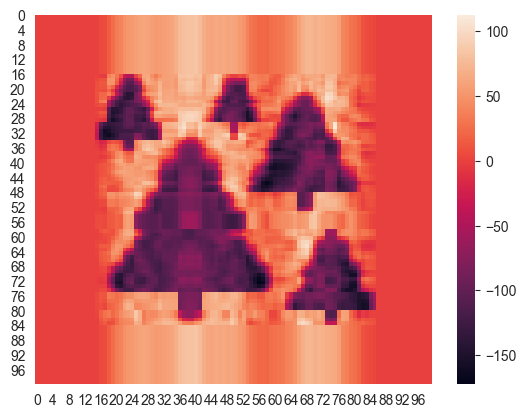

In [5]:
sns.heatmap(centralized_data)